# 0. Setup

In [1]:
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px

sys.path.append("..")

import arcadia_pycolor as apc

apc.mpl.setup()
apc.plotly.setup()

# 1. Stacked bar chart with `matplotlib`

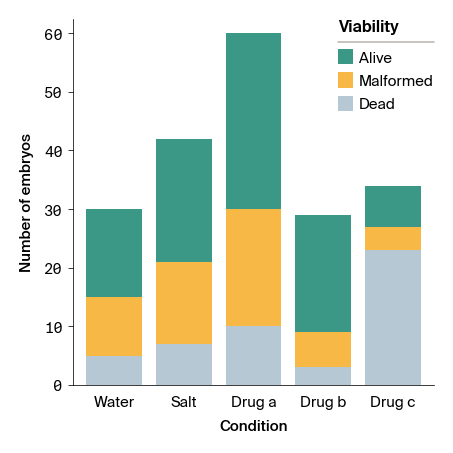

In [2]:
categories = ["Water", "Salt", "Drug A", "Drug B", "Drug C"]
subcategories = ["dead", "malformed", "alive"]
data = np.array(
    [
        [5, 10, 15],
        [7, 14, 21],
        [10, 20, 30],
        [3, 6, 20],
        [23, 4, 7],
    ]
)

fig, ax = plt.subplots(figsize=apc.mpl.get_figure_dimensions("half_square"), layout="constrained")

# Initialize the bottom array to 0
bottom = np.zeros(len(categories))

colors = [apc.denim, apc.canary, apc.seaweed]

# Loop through each subcategory and plot
for i in range(len(subcategories)):
    ax.bar(categories, data[:, i], bottom=bottom, label=subcategories[i], color=colors[i])
    bottom += data[:, i]

ax.set_xlabel("Condition")
ax.set_ylabel("Number of embryos")

legend = ax.legend()
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels))
ax.get_legend().set_title("Viability")  # type: ignore

apc.mpl.style_plot(ax, categorical_axes="x", monospaced_axes="y")

plt.show()

# 2. Stacked bar chart with `plotly`

In [ ]:
df = pd.DataFrame(data, columns=subcategories)
df["Categories"] = categories

fig = px.bar(
    df,
    x="Categories",
    y=subcategories,
    labels={"Categories": "Condition", "value": "Number of embryos"},
    color_discrete_map={
        "alive": apc.seaweed,
        "malformed": apc.canary,
        "dead": apc.denim,
    },
)

fig.update_layout(legend_title_text="viability")

apc.plotly.style_plot(fig, categorical_axes="x", monospaced_axes="y")
apc.plotly.style_legend(fig)
apc.plotly.add_commas_to_axis_tick_labels(fig)
apc.plotly.set_figure_dimensions(fig, "half_square")

fig.show()